# [IAPR][iapr]: Lab 1 ‒  Image segmentation


**Group ID:** xx

**Author 1 (sciper):** Student Name 1 (xxxxx)  
**Author 2 (sciper):** Student Name 2 (xxxxx)   
**Author 3 (sciper):** Student Name 3 (xxxxx)   

**Release date:** 12.03.2021  
**Due date:** 26.03.2021 


## Important notes

The lab assignments are designed to teach practical implementation of the topics presented during class well as preparation for the final project, which is a practical project which ties together the topics of the course. 

As such, in the lab assignments/final project, unless otherwise specified, you may, if you choose, use external functions from image processing/ML libraries like opencv and sklearn as long as there is sufficient explanation in the lab report. For example, you do not need to implement your own edge detector, etc.

**! Before handling back the notebook !** rerun the notebook from scratch `Kernel` > `Restart & Run All`


[iapr]: https://github.com/LTS5/iapr

---
## 0. Extract relevant data
We first need to extract the `lab-01-data.tar.gz` archive.
To this end, we use the [tarfile] module from the Python standard library.

[tarfile]: https://docs.python.org/3.6/library/tarfile.html

In [1]:
import tarfile
import os

data_base_path = os.path.join(os.pardir, 'data')
data_folder = 'lab-01-data'
tar_path = os.path.join(data_base_path, data_folder + '.tar.gz')

if not os.path.exists(tar_path):
    raise Exception('Path to is not valid {}'.format(tar_path))
    
with tarfile.open(tar_path, mode='r:gz') as tar:
    tar.extractall(path=data_base_path)

---
## Part 1: Brain segmentation

Your goal: compute the size of the brain (without the skull) in pixels in a 2D image of a human head taken by Magnetic Resonance Imaging (MRI) using:
* Region growing (5 pts)
* Contour detection (5 pts)
* Additional method of your choice (5 pts)

Each section should display the resulting segmenttion as well as the size in pixel of the detected region. Comment each method limitations and/or advantages.

### 1.1 Brain image visualization

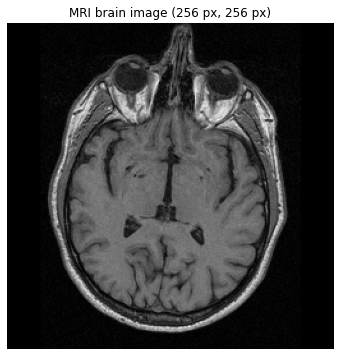

In [2]:
import skimage.io
import matplotlib.pyplot as plt
%matplotlib inline

# Load image
data_path = os.path.join(data_base_path, data_folder)
brain_im = skimage.io.imread(os.path.join(data_path, 'brain-slice40.tiff'))
im_h, im_w = brain_im.shape

# Display MRI image
fig, ax = plt.subplots(1, 1, figsize=(6, 6))
ax.imshow(brain_im, cmap='gray')
ax.set_title('MRI brain image ({} px, {} px)'.format(im_h, im_w))
ax.axis('off')
plt.show()

### 1.2 Region growing (5pts)

In [3]:
import numpy as np

def region_growing(img, seed):
    
    neighbors = [(-1, 0), (1, 0), (0, -1), (0, 1)]
    intensity_diff_threshold = 20
    region_size = 1
    intensity_difference = 0
    neighbor_points_list = []
    neighbor_intensity_list = []
    seed_count = 0
    
    #initialisation of the mean
    region_mean = img[seed]
    
    height, width = img.shape
    image_size = height * width
    
    #result array: the pixels in the region will be at 255
    segmented_img = np.zeros((height, width, 1), np.uint8)
    #memory of the place and order of the seed
    seed_order = np.zeros((height, width), np.uint64)
    
    while(1):
        neighbor_points_list = []
        neighbor_intensity_list = []
        counter = 0
        for i in range(4):
            x_temp = seed[0] + neighbors[i][0]
            y_temp = seed[1] + neighbors[i][1]

            inside_image = (x_temp >= 0) & (y_temp >= 0) & (x_temp < height) & (y_temp < width)
            
            #conditions to be potentialy in the region
            if (abs(int(img[x_temp, y_temp])-region_mean) < intensity_diff_threshold) & (inside_image) & (segmented_img[x_temp, y_temp] == 0):
                neighbor_points_list.append([x_temp, y_temp])
                neighbor_intensity_list.append(img[x_temp, y_temp])
                counter += 1
                
        #if no neighbor pixel satisfy the conditions
        #we go to the previous seed
        if (counter == 0):
            seed_order[seed[0], seed[1]] = 0
            seed_count -= 1
            
            #when we are back at the first seed, the segmentation is finished
            if seed_count == 0 or not np.where(seed_order == (seed_count))[0].size > 0: 
                print('The size of the region is : {}px'.format(region_size))
                return segmented_img

            seed[0] = np.where(seed_order == (seed_count))[0][0]
            seed[1] = np.where(seed_order == (seed_count))[1][0]
            
        #if at least one neighbor pixel satisfy the condition  
        #the neighbor the closest to the mean is added to the region and becomes the seed 
        else :
            distance = abs(neighbor_intensity_list-region_mean)
            pixel_distance = min(distance)
            index = np.where(distance == pixel_distance)[0][0]
            region_size += 1
            region_mean = (region_mean*(region_size-1)+img[x_temp,y_temp])/region_size
            seed_count += 1
            seed = neighbor_points_list[index]
            segmented_img[seed[0], seed[1]] = 255
            seed_order[seed[0], seed[1]] = seed_count
    
    

The size of the region is : 15875px


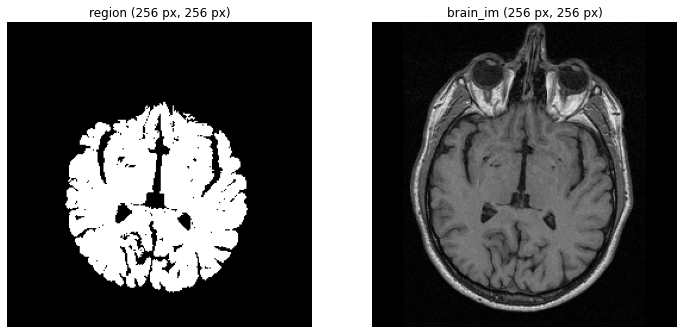

In [4]:
seed = (128, 115)

region = region_growing(brain_im, seed)

# Display region
fig, ax = plt.subplots(1, 2, figsize=(12, 12))
ax[0].imshow(region, cmap='gray')
ax[0].set_title('region ({} px, {} px)'.format(im_h, im_w))
ax[0].axis('off')
ax[1].imshow(brain_im, cmap='gray')
ax[1].set_title('brain_im ({} px, {} px)'.format(im_h, im_w))
ax[1].axis('off')

plt.show()

### 1.3 Contour detection (5pts)

In [ ]:
# Add your implementation and discussion

### 1.4 Additional method (5pts)

In [ ]:
# Add your implementation and discussion

---
## Part 2: Shape/color segmentation

You will find hereafter three pictures taken under three different illuminations, containing some shapes with different colors. We ask you to create a routine to:

1. Count the number of shapes of each color (5pts).
2. Compute the total area (in pixels) of each color (5pts).

Please note that one specific challenge is to be robust to illumination changes. Therefore some kind of intensity normalization should probably be used.

### 2.1 Visualization

In [5]:
# Load images
im_names = ['arena-shapes-01', 'arena-shapes-02', 'arena-shapes-03']
filenames = [os.path.join(data_path, name) + '.png' for name in im_names]
ic = skimage.io.imread_collection(filenames)
images = skimage.io.concatenate_images(ic)
print('Number of images: ', images.shape[0])
print('Image size: {}, {} '.format(images.shape[1], images.shape[2]))
print('Number of color channels: ', images.shape[-1])

Number of images:  3
Image size: 480, 640 
Number of color channels:  3


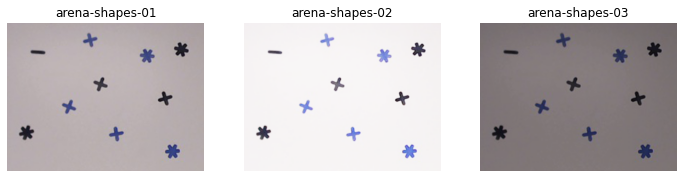

In [6]:
# Plot images
fig, axes = plt.subplots(1, 3, figsize=(12, 12))
for ax, im, nm in zip(axes.ravel(), images, im_names):
    ax.imshow(im)
    ax.axis('off')
    ax.set_title(nm)
plt.show()

### 2.2 Number of shapes of each color (5 pts)

In [24]:
def normalize(img_input):
    
    norm_img = np.zeros((480,640))
    normalized_img = cv2.normalize(img_input, norm_img, 0, 255, cv2.NORM_MINMAX)
    
    whitebalanced = img_as_ubyte(
            (normalized_img*1.0 / np.percentile(normalized_img, 
             95, axis=(0, 1))).clip(0, 1))
    
    return whitebalanced

#https://jephraim-manansala.medium.com/image-processing-with-python-color-correction-using-white-balancing-6c6c749886de

In [8]:
#segmentation using color correction and multiple thresholds
import cv2
from skimage import measure
from skimage import img_as_ubyte

def count_number_shapes(img):

    image_blue = img[:,:,2].copy()
    image_red = img[:,:,0].copy()
    image_green = img[:,:,1].copy()
    
    
    #extract the black shapes from the blue channel
    black_shapes = np.zeros(image_blue.shape[0:2])
    black_shapes[image_blue<140] = 255
    
    #extract the blue shapes from the blue and red channel
    blue_shapes = np.zeros(image_blue.shape[0:2])
    blue_shapes[(image_red<160) & (image_blue>160)] = 255
        

    # Display
    fig, ax = plt.subplots(1, 3, figsize=(12, 12))
    
    ax[0].imshow(img)
    ax[0].set_title('normalized image')
    ax[0].axis('off')
    ax[1].imshow(black_shapes, cmap='gray')
    ax[1].set_title('black shapes')
    ax[1].axis('off')
    ax[2].imshow(blue_shapes, cmap='gray')
    ax[2].set_title('blue shapes')
    ax[2].axis('off')
    
    plt.show()

    labels_black = measure.label(black_shapes)
    labels_blue = measure.label(blue_shapes)
    black_count = 0
    blue_count = 0
    
    #Count only the shapes with an area bigger than 200px
    for shape in measure.regionprops(labels_black):
        if shape.area >= 200:
            black_count +=1

    for shape in measure.regionprops(labels_blue):
        if shape.area >= 200:
            blue_count +=1     
            
    


    print('number of black shapes : {}'.format(black_count))
    print('number of blue shapes : {}'.format(blue_count))
    
    black_area = measure_area(labels_black)
    blue_area = measure_area(labels_blue)
    print('area of black shapes : {}'.format(black_area))
    print('area of blue shapes : {}'.format(blue_area))



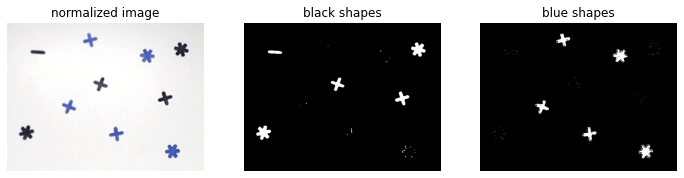

number of black shapes : 5
number of blue shapes : 5
area of black shapes : 4582
area of blue shapes : 4268


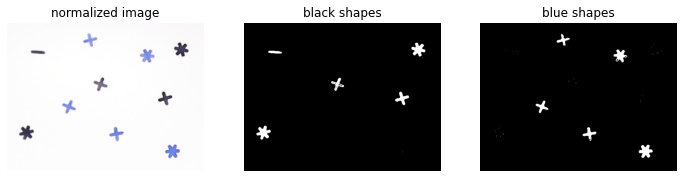

number of black shapes : 5
number of blue shapes : 5
area of black shapes : 3889
area of blue shapes : 3899


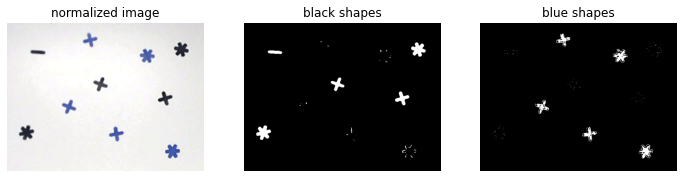

number of black shapes : 5
number of blue shapes : 5
area of black shapes : 4697
area of blue shapes : 3654


In [25]:
image_1_norm = normalize(images[0])
count_number_shapes(image_1_norm)


image_2_norm = normalize(images[1])
count_number_shapes(image_2_norm)


image_3_norm = normalize(images[2])
count_number_shapes(image_3_norm)



### 2.3 Total area (in pixels) of each color (5 pts)

In [10]:
def measure_area(labels):
    area = 0
    
    for shape in measure.regionprops(labels):
        if shape.area >= 200:
            area += shape.area
    
    return area